# Pymaceuticals Inc.
---

### Analysis

I begin on a philosophical note.  The irony of confining defenseless creatures, subjecting them (clearly without their consent), to experimental treatment, and uncompassionately (perhaps an unfair stereotype of the scientific temperament) observing their response, all for the furtherance of a field that heralds the oath ‘do no harm’ never escapes me when considering clinical trial phase-based medical research.  To be honest, as a career data scientist, I have personally contributed to such research efforts, and yet it does haunt my conscience at times.  Such discussion is historically in the domain of philosophy, and, more recently, medical ethics, so I pivot back to the assignment at hand.  But, one final note, interestingly a new law was instated in January of this year that eliminates the requirement that drug development undergo testing in animals before given to willing participants in human trials.  And thus we evolve 😊.

Consider the following insights and further analytic questions that arise from the Pymaceuticals’ assignment:

- 1)  Looking at the chart showing the final tumor volume across four of the treatment regimens, I note the differing ‘final timepoint’ markers—the point at which the final observation was recorded. Take, for example, subject a203 whose final metric is recorded at timepoint 45.  This is over 75% greater than that of z435, whose final metric is taken only at timepoint 10.  Is it the case that the final timepoint is taken at, or just before, the time of death?  If so, this could make sense in terms of disease progression and drug response.  If this is not the case, perhaps the next iteration of the study should consider keeping the final timepoint constant among all study subjects. In all, further clarification in this regard is needed.
---
- 2)  In looking at that line plot of Capomulin treatment of mouse l509, a positive drug response does not take effect until about 20 days in.  In fact, the first 20 days of dosing show dramatic growth in tumor size.  One wonders if it takes this long for the drug to show a therapeutic impact in a simpler and smaller organism, how long will it take in humans for whom the treatment is designed?  It could be the case that disease progression outpaces therapeutic effect to the extent that use, with risk of side-effect, is deemed null and void. Dosage, concentration of active ingredient, and the rate of absorption must all be considered. 
---
- 3)  Also, we do see tumor size start to rebound in growth around day 35.  This may indicate the adaptation of the disease, or the body developing a drug resistance.  Although this, as well as the above, observation is of only one subject, mouse l509, it does point to a furthermore focused examination of the Capomulin treatment across the experimental population as a whole.
---
- 4)  When looking at the scatter plot of the Capomulin regimen ‘Mouse Weight vs. Average Tumor Volume’, we see that study subjects of greater weight have larger tumors.  In fact, the calculated correlation between mouse weight and average tumor volume is noted here to be 0.84, which further confirms a strong relationship between the two.  This is counter to the assumption that larger tumor size and growth would be evident of a subject further along in disease progression, therefore with increased frailty due to wasting, which is often evident in weight loss.  Unless, perhaps it is the case, that organisms of larger mass will have proportionally larger tumors at comparable disease progression to those that are smaller.  Or perhaps it is the weight of the tumor itself – imagine a large heavy mass for instance, contributing to the overall weight of the experimental subject.  All interesting questions for which to investigate further.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame.
study_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview.
study_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# QA CHECK: Retrieve complete list of variable names (for future reference, accurate spelling, etc.).
study_data_complete_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [3]:
# Checking the number of mice.
mouse_count = len(study_data_complete_df["Mouse ID"].value_counts())
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint.
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete_df.duplicated(subset=["Mouse ID","Timepoint"])

duplicated_study_data_complete=study_data_complete_df.loc[study_data_complete_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicated_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete_df.loc[study_data_complete_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_df=study_data_complete_df.loc[study_data_complete_df["Mouse ID"]!="g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_tp_count = len(clean_study_data_df["Mouse ID"].value_counts())
unique_mouse_tp_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median=clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var=clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std=clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=clean_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


drug_regimen_stats_df=pd.DataFrame({
    "mean":mean,
    "median":median,
    "var":var,
    "std":std,
    "sem":sem
})

drug_regimen_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution).
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_stats_df.agg(['mean','median','var','std','sem'])
drug_regimen_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: >

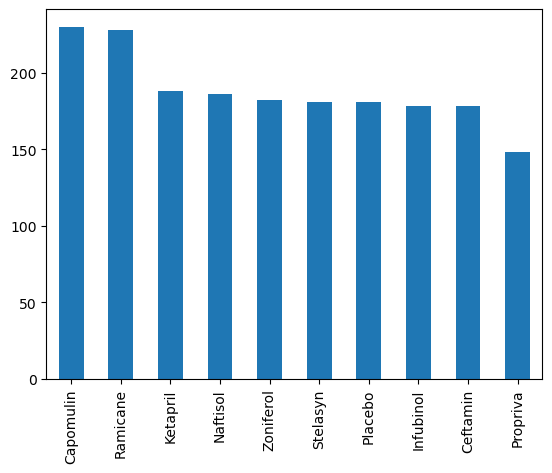

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Count=clean_study_data_df["Drug Regimen"].value_counts()
Drug_Count.plot.bar()

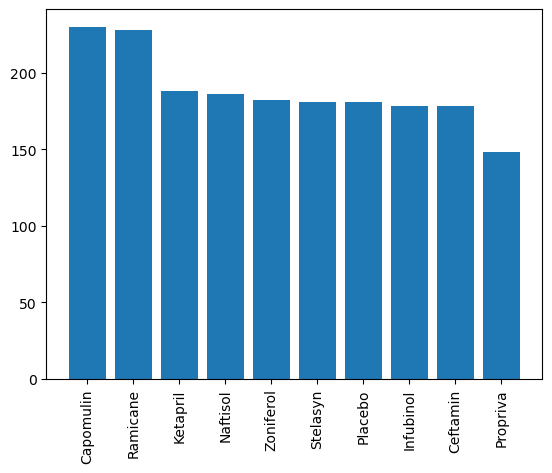

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(Drug_Count.index.values,Drug_Count.values)
plt.xticks(rotation=90)
plt.show()

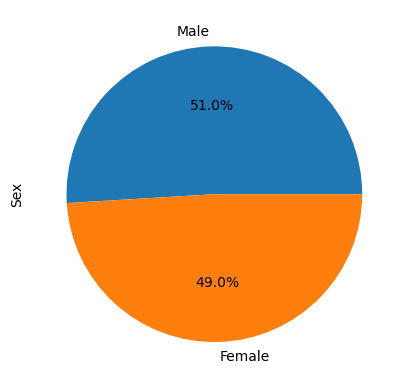

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.
Gender_Count=clean_study_data_df["Sex"].value_counts()
Gender_Count.plot.pie(autopct="%1.1f%%")
plt.show()

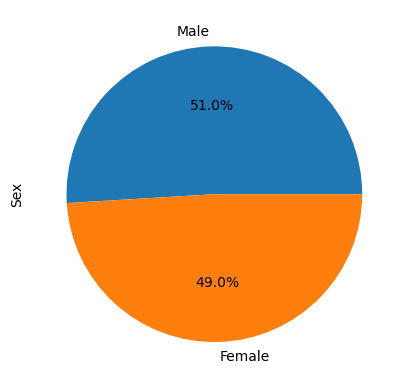

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
plt.pie(Gender_Count.values, labels=Gender_Count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
#QC - Index with values check:
Gender_Count

Male      958
Female    922
Name: Sex, dtype: int64

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse.
max_tp=clean_study_data_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint.
clean_study_data_df=pd.merge(max_tp,clean_study_data_df, on=["Mouse ID", "Timepoint"], how="left")

In [20]:
clean_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for a 'for-loop' (and later for plot labels).
drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting).
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in drug_list:
    volume=clean_study_data_df.loc[clean_study_data_df["Drug Regimen"]==drug_regimen,"Tumor Volume (mm3)"]
    tumor_list.append(volume)
# QC Check - Note, voume is a dataframe series (like one column of data).     
# print(volume)                                    

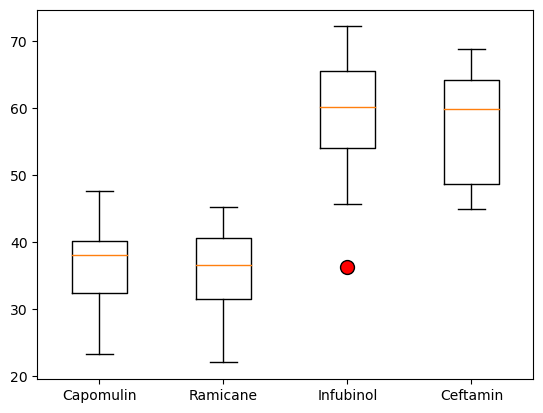

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops=dict(markerfacecolor="red",markersize=10)
plt.boxplot(tumor_list,labels=drug_list, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

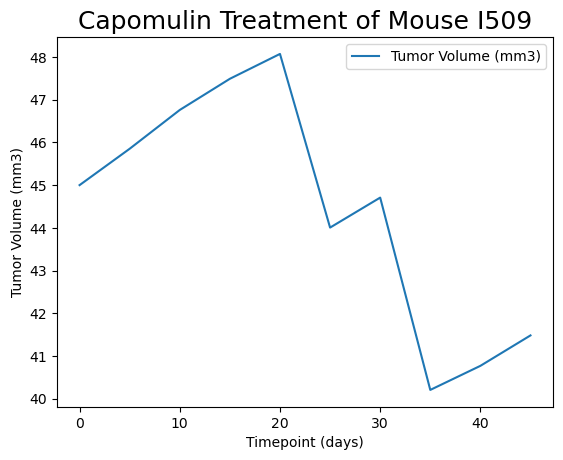

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
Mouse_l509_df = study_data_complete_df.loc[(study_data_complete_df["Mouse ID"]=="l509")]
type(Mouse_l509_df)

Mouse_l509_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse I509", fontsize=18)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

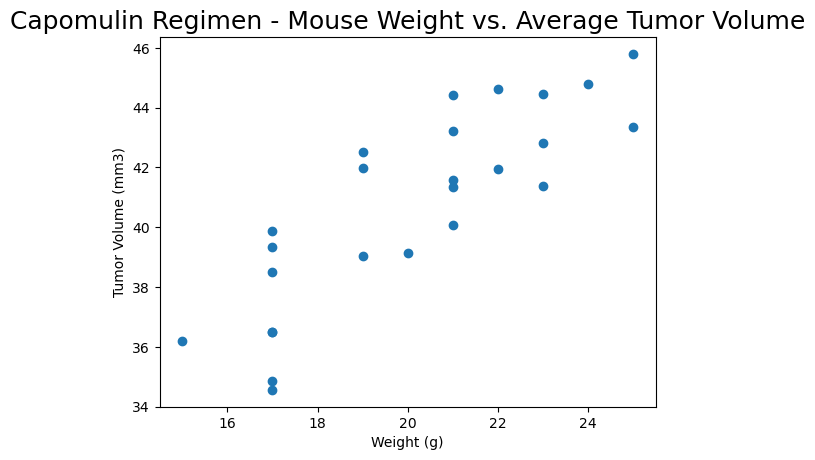

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.
wt_cap = study_data_complete_df.loc[(study_data_complete_df["Drug Regimen"] == "Capomulin")]
wt_cap_avg=wt_cap.groupby("Mouse ID").mean()[["Weight (g)","Tumor Volume (mm3)"]]
plt.title("Capomulin Regimen - Mouse Weight vs. Average Tumor Volume", fontsize=18)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(wt_cap_avg["Weight (g)"],wt_cap_avg["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen.

correlation = wt_cap_avg.corr()
print("The correlation between mouse weight and the average tumor volume is ", correlation.loc['Tumor Volume (mm3)', 'Weight (g)'].round(2))

The correlation between mouse weight and the average tumor volume is  0.84


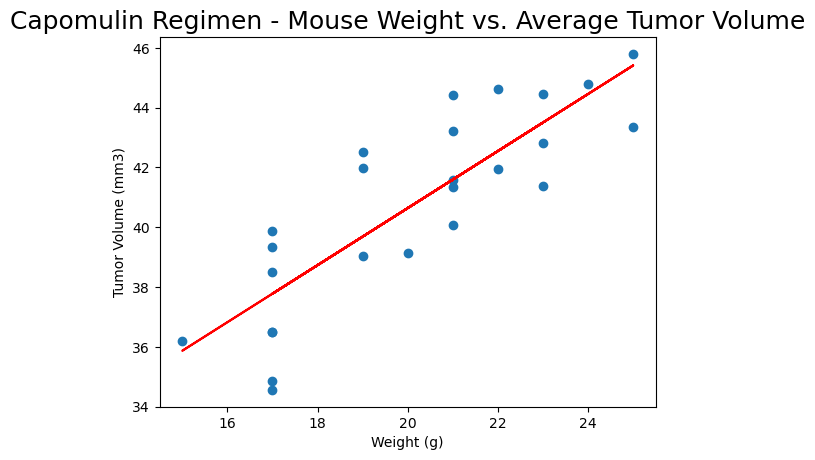

In [26]:
# Add the linear regression model on top of scatter plot. 
wt_cap = study_data_complete_df.loc[(study_data_complete_df["Drug Regimen"] == "Capomulin")]
wt_cap_avg=wt_cap.groupby("Mouse ID").mean()[["Weight (g)","Tumor Volume (mm3)"]]
plt.title("Capomulin Regimen - Mouse Weight vs. Average Tumor Volume", fontsize=18)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(wt_cap_avg["Weight (g)"],wt_cap_avg["Tumor Volume (mm3)"])
m, b = np.polyfit(wt_cap_avg["Weight (g)"],wt_cap_avg["Tumor Volume (mm3)"], 1)
plt.plot(wt_cap_avg["Weight (g)"], m*(wt_cap_avg["Weight (g)"])+b , color="red")
plt.show()